

# <font color=#8C506A> <u>Ana Carolina Tavares – RM552283</u></font>
# <font color=#8C506A> <u>Sofia Sprocatti Silva – RM99208</u></font>
# <font color=#8C506A> <u>Caique Almeida Dias – RM99778</u></font>
# <font color=#8C506A> <u>Vinicius Rebollo Minei – RM98486</u></font>
# <font color=#8C506A> <u>Felipe Dias Cerezuella – RM551663</u></font>


[Fonte da base dados](https://https://www.kaggle.com/code/yuvalaltman/postpartum-depression-analysis)

**Análise de Depressão Pós-Parto**

O dataset em questão concentra-se na análise de depressão pós-parto, uma condição que pode afetar mulheres após o nascimento de seus filhos. Este conjunto de dados oferece uma visão abrangente das variáveis relacionadas a esse tema delicado, com potencial para contribuir significativamente para a compreensão e gestão da depressão pós-parto.

**Características Principais:**

1. **Identificação Demográfica:** O dataset inclui informações demográficas das pacientes, como idade, estado civil, e nível educacional. Essas variáveis são cruciais para entender como fatores sociodemográficos podem estar relacionados à depressão pós-parto.
2. **Dados Clínicos:** Aspectos clínicos, como histórico de gravidez, tipo de parto e condições de saúde, estão presentes. Esses dados oferecem insights valiosos sobre a interação entre a saúde física e mental durante o período pós-parto.
3. **Avaliação de Saúde Mental:** A inclusão de pontuações em escalas de depressão pós-parto fornece uma medida objetiva do estado mental das pacientes. Essas avaliações podem ser fundamentais para entender a severidade da condição.

**Como a IA Pode Auxiliar Durante o Pré-Natal:**
A integração da inteligência artificial (IA) neste contexto específico do pré-natal pode oferecer diversas contribuições essenciais:

1. **Prevenção e Rastreamento Antecipado:** Algoritmos de machine learning podem ser treinados para identificar padrões sutis em dados demográficos e clínicos que indicam um maior risco de desenvolvimento de depressão pós-parto. Isso possibilita a implementação de estratégias preventivas e intervenções antecipadas.
2. **Personalização do Acompanhamento:** Sistemas de IA podem adaptar-se às características individuais das pacientes, oferecendo um acompanhamento personalizado. Isso pode incluir a entrega de informações relevantes, suporte emocional virtual e sugestões de práticas de autocuidado.
3. **Avaliação Contínua:** Algoritmos de aprendizado de máquina podem monitorar continuamente os dados fornecidos pelas pacientes ao longo do pré-natal, permitindo uma avaliação dinâmica do risco de depressão pós-parto. Isso cria oportunidades para intervenções proativas à medida que a gestação progride.
4. **Identificação de Fatores de Risco Específicos:** A IA pode analisar grandes conjuntos de dados para identificar fatores de risco específicos associados à depressão pós-parto em diferentes grupos demográficos. Essa compreensão mais granular pode orientar estratégias preventivas mais eficazes.
5. **Integração com o Cuidado Clínico Tradicional:** Sistemas de IA podem ser integrados aos cuidados pré-natais tradicionais, fornecendo uma abordagem holística que combina a expertise humana com a capacidade analítica e preditiva da IA.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime
from sklearn.model_selection import train_test_split
from flask import Flask, request, jsonify


import os
import re
import random
from joblib import dump, load
from matplotlib.transforms import Affine2D, offset_copy
import math
import scipy.stats as ss
from collections import Counter

ModuleNotFoundError: No module named 'pandas'

# **Carregando um conjunto de dados**

In [ ]:
df = pd.read_csv('postnataldata.csv')
df.head()

In [ ]:
df.info()
df.describe()

# **As idades mais afetadas com a depressão pós parto**






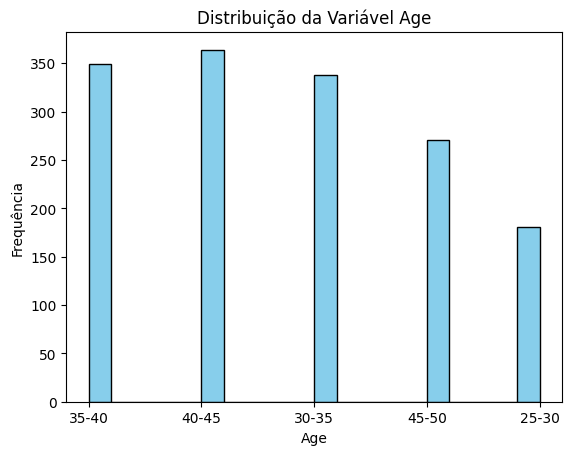

In [ ]:
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Variável Age')
plt.xlabel('Age')
plt.ylabel('Frequência')
plt.show()

## Possíveis Explicações para a Alta Prevalência de Depressão Pós-Parto em Mulheres de 40 a 45 Anos

1. **Expectativas Socioculturais:**
   - Pressão para atingir marcos na carreira e vida pessoal pode gerar estresse e ansiedade.

2. **Equilíbrio Trabalho-Vida:**
   - Conciliar carreira, relacionamento e parentalidade pode aumentar o estresse.

3. **Fatores Hormonais:**
   - Flutuações hormonais associadas à gravidez podem interagir de maneira única com o perfil hormonal.

4. **Pressões Familiares:**
   - Responsabilidades adicionais, como cuidar de membros da família mais velhos, aumentam a pressão.

5. **Experiências de Vida Anteriores:**
   - Histórico de eventos traumáticos ou depressão pode aumentar a vulnerabilidade.

6. **Isolamento Social:**
   - Mudanças nas redes sociais e o risco de isolamento social são fatores contribuintes.

7. **Pressões de Imagem Corporal:**
   - Pressões culturais relacionadas à aparência podem afetar a autoestima.

8. **Interrupção das Rotinas Pessoais:**
   - Adaptar-se às mudanças de estilo de vida associadas à maternidade pode ser desafiador.

É crucial destacar que a depressão pós-parto é multifatorial, e a interação desses fatores contribui para sua ocorrência. Suporte emocional, acompanhamento médico e conscientização são essenciais na prevenção e tratamento.


# **Análise estatística exploratória**

In [ ]:
df = pd.read_csv('postnataldata.csv')
df = df.loc[:, df.nunique() > 1]
corr_matrix = df.corr(numeric_only=True)

In [ ]:
df = pd.read_csv('postnataldata.csv')
df = df.dropna(axis=1, how='all')
df = df.loc[:, df.nunique() > 1]
corr_matrix = df.corr(numeric_only=True)

In [ ]:
df.isnull().sum()

Timestamp                                     0
Age                                           0
Feeling sad or Tearful                        0
Irritable towards baby & partner              6
Trouble sleeping at night                     0
Problems concentrating or making decision    12
Overeating or loss of appetite                0
Feeling anxious                               0
Feeling of guilt                              9
Problems of bonding with baby                 0
Suicide attempt                               0
dtype: int64

# **A depressão pós parto tambem gera problemas de concentração e tomada de decisão**

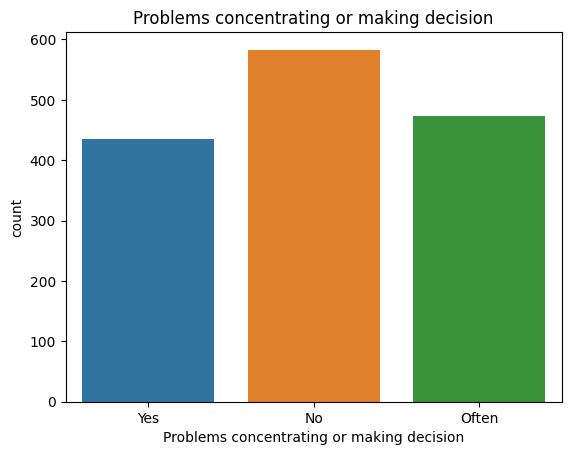

In [ ]:
sns.countplot(x='Problems concentrating or making decision', data=df)
plt.title('Problems concentrating or making decision')
plt.show()


A depressão pós-parto, além de afetar o bem-estar emocional, pode ter impactos significativos nas habilidades cognitivas, como concentração e tomada de decisão. Algumas possíveis causas desse fenômeno incluem:

1. **Desregulação Hormonal:**
   - As mudanças hormonais durante e após a gravidez podem influenciar negativamente a função cognitiva, incluindo a concentração.

2. **Distúrbios do Sono:**
   - A falta de sono adequado, comum durante o pós-parto, está associada à diminuição da concentração e capacidade de tomar decisões.

3. **Estresse e Ansiedade:**
   - A sobrecarga emocional causada pela depressão pós-parto pode gerar estresse crônico, comprometendo a função cognitiva.

4. **Impacto nas Atividades Diárias:**
   - A depressão pós-parto muitas vezes resulta em dificuldades para realizar tarefas diárias, afetando a rotina e exigindo mais esforço mental.

5. **Autoestima e Autoconfiança:**
   - A baixa autoestima associada à depressão pós-parto pode influenciar a confiança na tomada de decisões.

6. **Preocupações com o Bebê:**
   - A ansiedade e as preocupações constantes sobre o bem-estar do bebê podem desviar a atenção, prejudicando a concentração em outras áreas.

7. **Isolamento Social:**
   - A depressão pós-parto pode levar ao isolamento, reduzindo as interações sociais que são fundamentais para a saúde cognitiva.

8. **Fatores Psicossociais:**
   - Elementos como pressões sociais, financeiras e expectativas irrealistas podem contribuir para o estresse mental e a dificuldade de concentração.

Abordar esses aspectos é crucial para um tratamento abrangente da depressão pós-parto, visando não apenas a saúde emocional, mas também a manutenção das capacidades cognitivas da mãe.

In [ ]:
print(df['Problems concentrating or making decision'].unique())

['Yes' 'No' 'Often' nan]


## <font color=#3d5a80> <u>Constantes</u></font>

In [ ]:
df.columns = df.columns.str.replace(" ", "_")
target = 'Problems_concentrating_or_making_decision'
df[target] = df[target].str.replace(" ", "_")

In [ ]:
SEED = 42

target = "Feeling_anxious"

COLORS = {
    "fig_bg": "#f6f5f5",
    "plot_neut": "#ddbea9",
    "plot_text": "#343a40",

    "class": {
        0: "#3d5a80",
        1: "#ee6c4d",
    },
    "class_light": {
        0: "#E0E7F0",
        1: "#FBE0D9",
    },

    "cmap_color_list": mpl.colors.LinearSegmentedColormap.from_list("", ["#FEF5F2", "#FBE0D9", "#F6AC9A", "#F28D74", "#EE6C4D"]),
    "cmap_pos": mpl.colors.LinearSegmentedColormap.from_list("", ["#F0F3F8", "#D1DBE9", "#A2B7D2", "#7493BC", "#6487B4", "#3D5A80"]),

    "conf": {
        "low": "#ef5b5b",
        "high": "#20a39e"
    }
}

colors_class_list = list(COLORS["class"].values())

FONT_KW = {
    "plot_title" : {
        "fontname": "serif",
        "weight": "bold",
        "size": "25",
        "style": "normal"
    },
    "plot_subtitle" : {
        "fontname": "serif",
        "weight": "bold",
        "size": "12",
        "style": "normal"
    },
    "subplot_title" : {
        "fontname": "serif",
        "weight": "bold",
        "size": "18",
        "style": "normal"
    },
    "subplot_title_small" : {
        "fontname": "serif",
        "weight": "bold",
        "size": "12",
        "style": "normal"
    },
    "plot_label" : {
        "fontname": "serif",
        "weight": "bold",
        "size": "16",
        "style": "normal"
    },
    "plot_label_small" : {
        "fontname": "serif",
        "weight": "bold",
        "size": "12",
        "style": "normal"
    },
    "plot_text" : {
        "fontname": "serif",
        "weight": "normal",
        "size": "12",
        "style": "normal"
    },
    "plot_text_small" : {
        "fontname": "serif",
        "weight": "normal",
        "size": "10",
        "style": "normal"
    },
}

class_dict = {0: "Not Anxious", 1: "Anxious"}

## <font color=#3d5a80><u>Amostragem de dados</u></font>

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=target).copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)



# <font color=#3d5a80> <u>Análise exploratória de dados (EDA)</u></font>

# Análise Detalhada de Componentes Importantes

## Suicidal Ideation
- A variável "Suicide_attempt" revela predominantemente respostas "No".
- Uma análise mais profunda desta categoria é crucial para compreender os riscos associados à depressão pós-parto, especialmente em casos de tentativa de suicídio.

## Sentimentos de Culpa e Ansiedade
- Observa-se a presença de sentimentos de culpa ("Feeling_of_guilt") e ansiedade ("Feeling_anxious") em algumas amostras.
- Esses sentimentos podem indicar aspectos emocionais relevantes, necessitando uma consideração mais aprofundada durante a análise.

## Correlações entre Variáveis
- A análise detalhada da matriz de correlação pode revelar relações entre diferentes variáveis.
- Essas correlações oferecem insights valiosos sobre as interações entre os sintomas associados à depressão pós-parto.

## Impacto da Idade
- A faixa etária de 40-45 anos emerge como mais afetada pela depressão pós-parto.
- Uma exploração mais profunda dessa faixa etária pode proporcionar insights sobre fatores específicos associados a essa população.

# Próximas Etapas Recomendadas

## Pré-processamento de Dados
- Tratamento de valores ausentes.
- Conversão de tipos de dados, se necessário.

## Análise Detalhada das Variáveis
- Investigação mais profunda de variáveis ligadas aos sentimentos de ansiedade, culpa e outros sintomas.

## Exploração da Faixa Etária Afetada
- Análise mais detalhada da faixa etária de 40-45 anos, incluindo fatores socioeconômicos e demográficos associados.

## Correlações e Modelagem
- Exploração minuciosa da matriz de correlação.
- Possível desenvolvimento de modelos preditivos para identificar fatores associados à depressão pós-parto.

Essas recomendações visam fornecer uma visão mais aprofundada dos aspectos críticos do conjunto de dados e orientar as próximas etapas de análise.


In [ ]:
df_eda = X_train.copy()
df_eda[target] = y_train.copy()

In [ ]:
df_eda.dtypes

Timestamp                                    object
Age                                          object
Feeling_sad_or_Tearful                       object
Irritable_towards_baby_&_partner             object
Trouble_sleeping_at_night                    object
Problems_concentrating_or_making_decision    object
Overeating_or_loss_of_appetite               object
Feeling_of_guilt                             object
Problems_of_bonding_with_baby                object
Suicide_attempt                              object
Feeling_anxious                              object
dtype: object

In [ ]:
df_eda.describe().T

,count,unique,top,freq
Timestamp,1202,90,6/15/2022 22:24,44
Age,1202,5,40-45,295
Feeling_sad_or_Tearful,1202,3,No,421
Irritable_towards_baby_&_partner,1197,3,Yes,437
Trouble_sleeping_at_night,1202,3,Two or more days a week,512
Problems_concentrating_or_making_decision,1191,3,No,473
Overeating_or_loss_of_appetite,1202,3,No,677
Feeling_of_guilt,1194,3,No,492
Problems_of_bonding_with_baby,1202,3,No,452
Suicide_attempt,1202,3,No,563


In [ ]:
df_eda.isna().sum()

Timestamp                                     0
Age                                           0
Feeling_sad_or_Tearful                        0
Irritable_towards_baby_&_partner              5
Trouble_sleeping_at_night                     0
Problems_concentrating_or_making_decision    11
Overeating_or_loss_of_appetite                0
Feeling_of_guilt                              8
Problems_of_bonding_with_baby                 0
Suicide_attempt                               0
Feeling_anxious                               0
dtype: int64

In [ ]:
df_eda.head()

,Timestamp,Age,Feeling_sad_or_Tearful,Irritable_towards_baby_&_partner,Trouble_sleeping_at_night,Problems_concentrating_or_making_decision,Overeating_or_loss_of_appetite,Feeling_of_guilt,Problems_of_bonding_with_baby,Suicide_attempt,Feeling_anxious
726,6/14/2022 20:03,40-45,Yes,No,No,Yes,Yes,Yes,Yes,No,No
1195,6/14/2022 23:26,30-35,Yes,Yes,No,Often,Not at all,Maybe,Sometimes,No,Yes
724,6/15/2022 22:24,40-45,Yes,NaN,No,NaN,No,NaN,Sometimes,No,Yes
806,6/14/2022 23:43,40-45,No,Sometimes,Yes,Often,No,No,No,No,Yes
2,6/14/2022 20:04,35-40,Yes,No,Yes,Yes,Yes,No,Sometimes,No,Yes


In [ ]:
{
    col: df_eda[col].unique()
    for col in df_eda.columns
    if col != "Timestamp"
}

{'Age': array(['40-45', '30-35', '35-40', '45-50', '25-30'], dtype=object),
 'Feeling_sad_or_Tearful': array(['Yes', 'No', 'Sometimes'], dtype=object),
 'Irritable_towards_baby_&_partner': array(['No', 'Yes', nan, 'Sometimes'], dtype=object),
 'Trouble_sleeping_at_night': array(['No', 'Yes', 'Two or more days a week'], dtype=object),
 'Problems_concentrating_or_making_decision': array(['Yes', 'Often', nan, 'No'], dtype=object),
 'Overeating_or_loss_of_appetite': array(['Yes', 'Not at all', 'No'], dtype=object),
 'Feeling_of_guilt': array(['Yes', 'Maybe', nan, 'No'], dtype=object),
 'Problems_of_bonding_with_baby': array(['Yes', 'Sometimes', 'No'], dtype=object),
 'Suicide_attempt': array(['No', 'Not interested to say', 'Yes'], dtype=object),
 'Feeling_anxious': array(['No', 'Yes'], dtype=object)}

# **Gráficos que notoriam os principais problemas que as mulheres enfrentam quando passam pela depressão pós parto**

Contagem de Tentativas de Suicídio

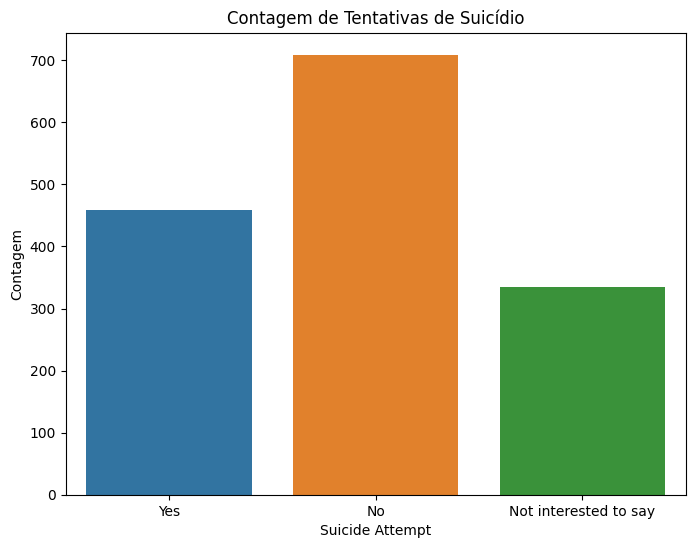

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Suicide_attempt', data=df)
plt.title('Contagem de Tentativas de Suicídio')
plt.xlabel('Suicide Attempt')
plt.ylabel('Contagem')
plt.show()

Sentimentos de Culpa

In [ ]:
guilt_mapping = {'No': 0, 'Maybe': 1, 'Yes': 2}
df['Feeling_of_guilt_numeric'] = df['Feeling_of_guilt'].map(guilt_mapping)

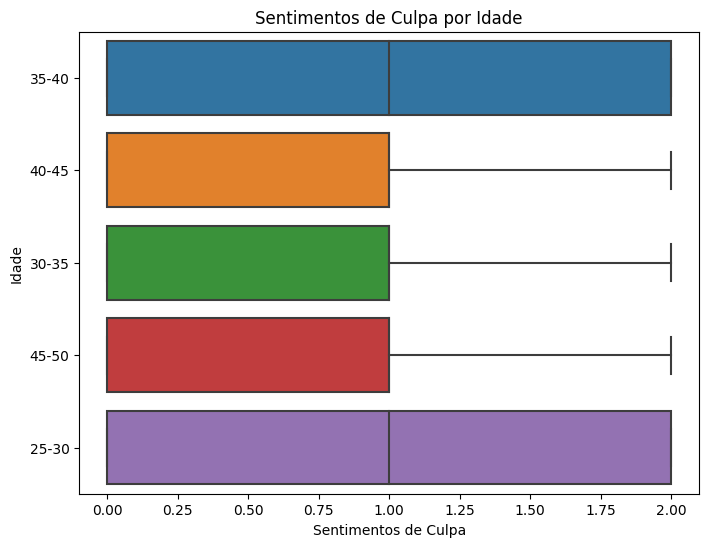

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Feeling_of_guilt_numeric', y='Age', data=df)
plt.title('Sentimentos de Culpa por Idade')
plt.xlabel('Sentimentos de Culpa')
plt.ylabel('Idade')
plt.show()


Gráfico de Dispersão entre Idade e Sentimentos de Ansiedade

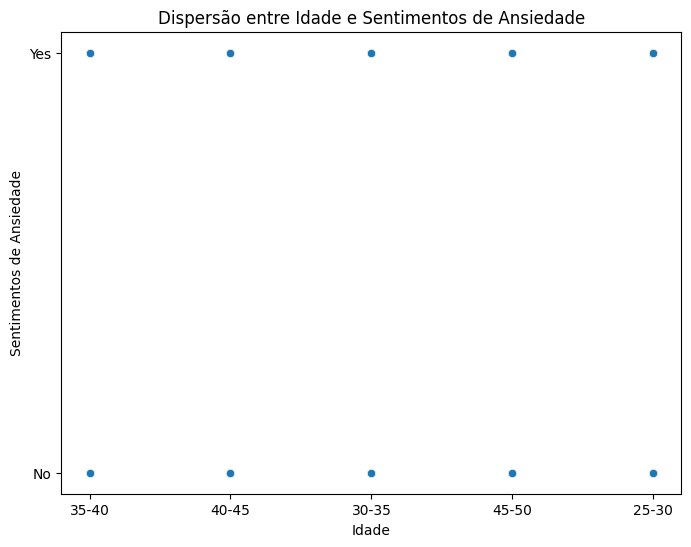

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Feeling_anxious', data=df)
plt.title('Dispersão entre Idade e Sentimentos de Ansiedade')
plt.xlabel('Idade')
plt.ylabel('Sentimentos de Ansiedade')
plt.show()

Gráfico de Barras Empilhadas para Sentimentos de Tristeza por Faixa Etária

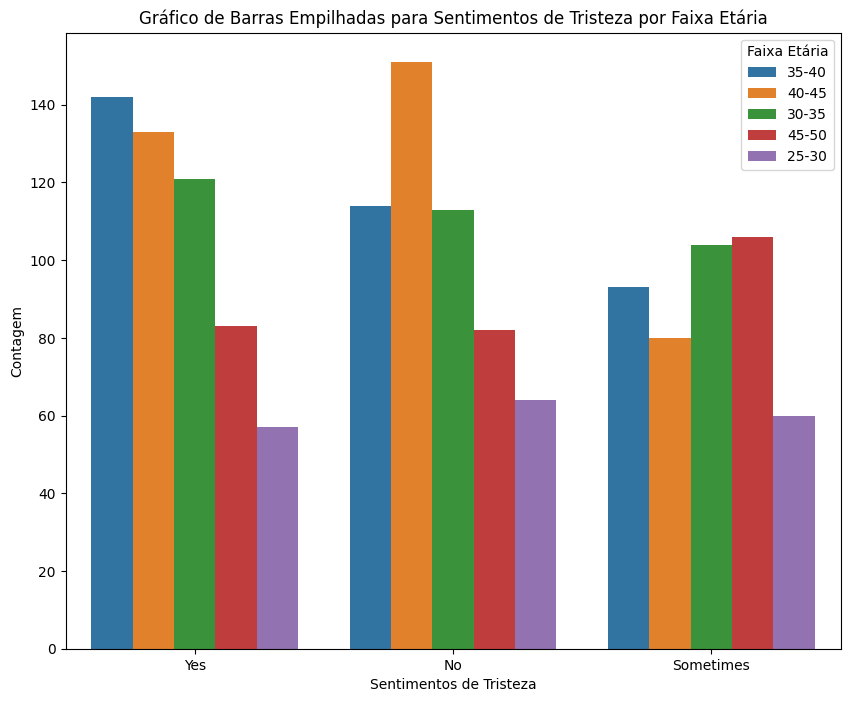

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Feeling_sad_or_Tearful', hue='Age', data=df)
plt.title('Gráfico de Barras Empilhadas para Sentimentos de Tristeza por Faixa Etária')
plt.xlabel('Sentimentos de Tristeza')
plt.ylabel('Contagem')
plt.legend(title='Faixa Etária')
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Feeling_sad_or_Tearful', data=df, hue='Feeling_anxious', palette='coolwarm', size='Suicide_attempt', sizes=(20, 200))
plt.title('Dispersão entre Idade, Sentimentos de Tristeza e Ansiedade')
plt.xlabel('Idade')
plt.ylabel('Sentimentos de Tristeza ou Choro')
plt.legend(title='Feeling Anxious', loc='upper right', labels=['No', 'Yes'])
plt.show()

NameError: name 'plt' is not defined

# **Modelo de regressão**

## Pré-Processamento de Dados

Antes de treinar o modelo, realizamos as seguintes etapas de pré-processamento:

- **Mapeamento de Faixa Etária:** Mapeamos as faixas etárias para valores numéricos.
- **Codificação One-Hot para Variáveis Categóricas:** Utilizamos a codificação one-hot para lidar com variáveis categóricas.
- **Imputação de Dados:** Imputamos valores ausentes, quando necessário, utilizando a média.

## Modelo de Regressão Linear

O modelo utilizado é uma regressão linear, que visa prever a sensação de ansiedade com base nas variáveis de entrada. A escolha desse modelo foi feita com base na natureza das variáveis e para fornecer uma interpretação inicial.

## Avaliação do Modelo

O modelo foi avaliado usando duas métricas principais:

- **R2 Score:** Uma medida da variabilidade explicada pelo modelo.
- **Mean Squared Error (MSE):** Uma medida da média dos quadrados dos erros entre os valores reais e os valores preditos.

## Resultados

Os resultados do modelo são os seguintes:

- **R2 Score: 0.3987**
- **Mean Squared Error: 0.1299**

## Conclusão

O modelo fornece uma compreensão inicial da relação entre as variáveis selecionadas e a sensação de ansiedade durante a depressão pós-parto. É importante lembrar que a interpretação desses resultados deve ser feita com cautela e em conjunto com especialistas em saúde mental.

In [ ]:
df = pd.read_csv('postnataldata.csv')

In [ ]:
X_reg = df.drop(columns=['Age', 'Timestamp', 'Feeling anxious']).copy()
y_reg = df['Feeling anxious'].map({'Yes': 1, 'No': 0}).copy()

In [ ]:
categorical_cols = X_reg.select_dtypes(include=['object']).columns
numeric_cols = X_reg.select_dtypes(exclude=['object']).columns

In [ ]:
encoder = OneHotEncoder(sparse_output=False, drop='first')
X_reg_encoded = pd.concat([X_reg[numeric_cols],
                           pd.DataFrame(encoder.fit_transform(X_reg[categorical_cols])),
                          ], axis=1)

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_reg_encoded_imputed = pd.DataFrame(imputer.fit_transform(X_reg_encoded), columns=X_reg_encoded.columns)

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg_encoded_imputed, y_reg, test_size=0.2, random_state=SEED)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(X_reg_train, y_reg_train)

LinearRegression()

In [ ]:
y_reg_pred = regression_model.predict(X_reg_test)

In [ ]:
r2 = r2_score(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)

In [ ]:
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')


R2 Score: 0.3987448243982985
Mean Squared Error: 0.12987233900867867


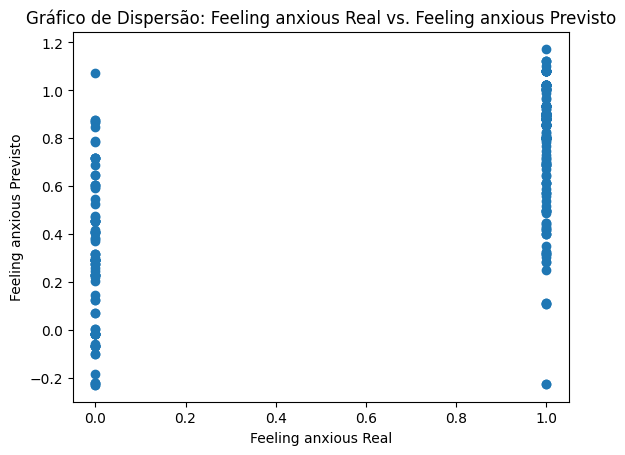

In [ ]:
plt.scatter(y_reg_test, y_reg_pred)
plt.xlabel('Feeling anxious Real')
plt.ylabel('Feeling anxious Previsto')
plt.title('Gráfico de Dispersão: Feeling anxious Real vs. Feeling anxious Previsto')
plt.show()

# **Modelo de Classificação:**

Este modelo utiliza uma regressão logística para classificar se uma pessoa está ou não se sentindo ansiosa após o parto. A variável alvo é "Feeling_anxious", que pode ter dois valores: "Yes" ou "No". O objetivo é prever a classe à qual um indivíduo pertence com base em diferentes características.

## Pré-processamento dos Dados

O conjunto de dados é inicialmente dividido em features numéricas e categóricas. As features numéricas são tratadas com imputação de valores médios e escala padrão, enquanto as categóricas passam por imputação de valores mais frequentes e codificação one-hot. Isso garante que todas as features estejam prontas para alimentar o modelo.

## Pipeline do Modelo

O modelo é construído usando a Regressão Logística como algoritmo de classificação. Um pipeline é estabelecido com etapas para pré-processamento e o classificador. O pré-processamento lida com a imputação de dados e a codificação de variáveis categóricas.

## Treinamento e Avaliação

O modelo é treinado usando um conjunto de treinamento e avaliado em um conjunto de teste. A avaliação é realizada utilizando métricas como precisão, recall, F1-score e acurácia, proporcionando uma visão abrangente do desempenho do modelo.

## Resultados

O relatório de classificação exibe as métricas de desempenho do modelo:

- **Precisão (Precision):** 87% para "Yes" e 88% para "No".
- **Revocação (Recall):** 94% para "Yes" e 73% para "No".
- **F1-Score:** 90% para "Yes" e 80% para "No".
- **Acurácia (Accuracy):** 87%.

Essas métricas indicam que o modelo tem uma boa capacidade de prever corretamente os casos de ansiedade pós-parto, com uma acurácia geral de 87%. As métricas de precisão e recall fornecem insights adicionais sobre o desempenho em cada classe.

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
classifier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=SEED))
])

In [ ]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Timestamp', 'Age', 'Feeling_sad_or_Tearful',
       'Irritable_towards_baby_&_partner', 'Trouble_sleeping_at_night',
       'Problems_concentrating_or_making_decision',
       'Overeating_or_loss_of_appetite', 'Feeling_of_guilt',
       'Problems_of_bonding_with_baby', 'Suicide_attempt'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
# Avaliar o modelo no conjunto de teste
y_pred = classifier.predict(X_test)


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.73      0.80       105
         Yes       0.87      0.94      0.90       196

    accuracy                           0.87       301
   macro avg       0.87      0.84      0.85       301
weighted avg       0.87      0.87      0.87       301



# **servidor Flask**

In [ ]:
dump(regression_model, 'regression_model.joblib')

['regression_model.joblib']

In [ ]:
dump(classifier, 'classification_model.joblib')

['classification_model.joblib']

Modificar o Script do Servidor Flask:

In [ ]:
app = Flask(__name__)

In [ ]:
# Carregar os modelos treinados
regression_model = load('regression_model.joblib')
classifier = load('classification_model.joblib')